In [1]:
import os

from descartes.patch import PolygonPatch
import joblib
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
pluto = gpd.read_file("data/pluto/MNMapPLUTO.shp")

In [3]:
final_light_d6 = pd.read_csv("data/bbl_2017-09-28/2017-09-28_d6_10m.csv")
final_light_d9 = pd.read_csv("data/bbl_2017-09-28/2017-09-28_d9_10m.csv")
for df in (final_light_d6, final_light_d9):
    del df["Unnamed: 0"]
    del df["lat"]
    del df["lng"]
final_light_d6 = final_light_d6.set_index("BBL").swapaxes(1, 0)
final_light_d9 = final_light_d9.set_index("BBL").swapaxes(1, 0)

1050 overlapping bbls


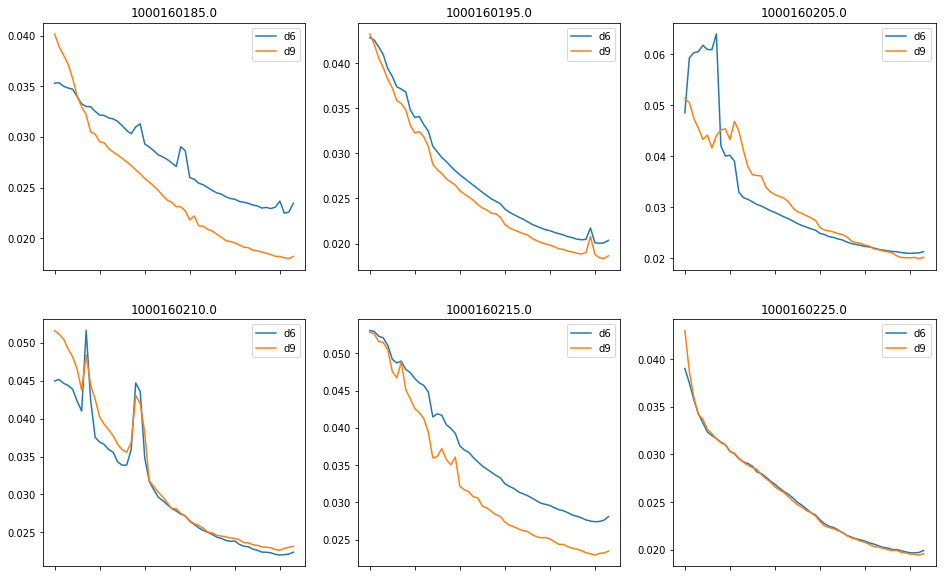

In [7]:
d6_in_d9 = np.array([c in final_light_d9 for c in final_light_d6.columns])
overlap = final_light_d6.columns[d6_in_d9]
print(len(overlap), "overlapping bbls")
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()
for i, ax in enumerate(axes):
    final_light_d6[overlap[i + 10]].plot(ax=ax, label='d6')
    final_light_d9[overlap[i + 10]].plot(ax=ax, label='d9')
    ax.legend()
    ax.set_title(overlap[i + 10])

0.0018906130171043665

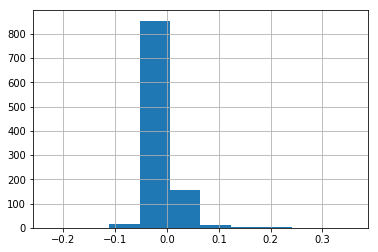

In [14]:
diffs = final_light_d9[overlap] - final_light_d6[overlap]
diffs.mean().hist()
diffs.mean().mean()

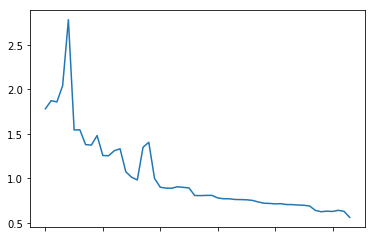

In [16]:
(diffs ** 2).sum(axis=1).plot()

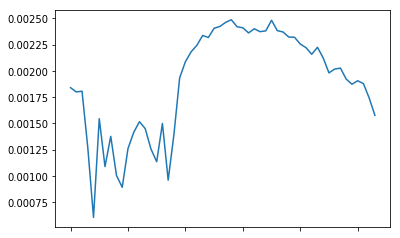

In [17]:
diffs.mean(axis=1).plot()

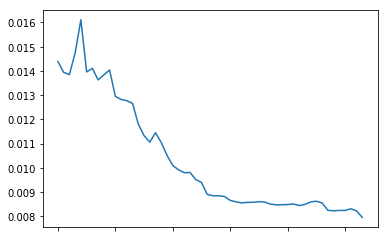

In [18]:
np.abs(diffs).mean(axis=1).plot()